# Task 2

## General instructions

First, update the following cell to have a link to your Homework 2 GitHub repository

https://github.com/lchenhub/eds220-hwk-2.git

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.


## About the data

In this task you will use [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County. 

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

/tmp/ipykernel_2069875/3247441416.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_sb.date = pd.to_datetime(aqi_sb.date)


<AxesSubplot:title={'center':'AQI levels in SB'}, xlabel='date'>

<Figure size 640x480 with 0 Axes>

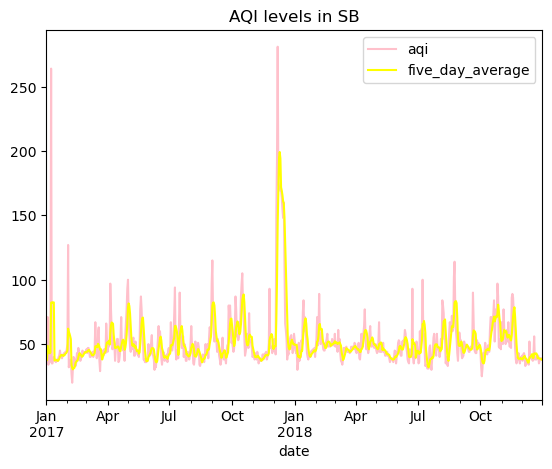

In [75]:
### ===== FINAL CODE =====

#2017 Daily AQI by County URL
#https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip

#2018 Daily AQI by County URL
#https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip


# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt

# read in files using pd.read_csv
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip')

# concatenate two dataframes
aqi = pd.concat([aqi_17, aqi_18])

# see initial column names: notice caps and spaces (difficult to work with!)
aqi.columns, '\n'

# re-assign the column names - .str.lower() makes them lower case
aqi.columns = aqi.columns.str.lower()
aqi.columns, '\n'

#  re-assign the column names again - .str.replace(' ','_') replaces the space for _ 
aqi.columns = aqi.columns.str.replace(' ','_')
aqi.columns, '\n'

# as a "one liner" you could achieve this column name cleaning like this:
# aqi.columns = aqi.columns.str.lower().str.replace(' ','_')

#select only data from SB county
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara']

#remove state_name, county_name, state_code and county_code columns 
aqi_sb.drop(['state_name', 'county_name', 'state_code', 'county_code'], axis=1)

#use pd.to_datetime to update date column to be a datetime object from object
aqi_sb.date = pd.to_datetime(aqi_sb.date)

#update index
aqi_sb = aqi_sb.set_index("date")

#datatype (dtype) is datetime64[ns]

# rolling() is a method for pandas.series that provides rolling window calculations
# the parameter '5D' indicates we want the window to be 5 days
# This is a lazy method (think groupby), we need to specify what we want to calculate over each window
# here we add the aggregator function mean()
# this indicates we want the mean over each window
# and we get a pd.Series as ouput
aqi_sb.aqi.rolling('5D').mean()

# add mean of 5-day avg as new column with [] and .mean
aqi_sb['five_day_average'] = aqi_sb.aqi.rolling('5D').mean()

# plot daily AQI and 5-day avg

#initialize plot
plt.figure()

#plot with 5-day avg on top of the AQI and customize labels and colors
aqi_sb.plot(y=['aqi', 'five_day_average'], title='AQI levels in SB', color = ['pink', 'yellow'])

#The Thomas fire event in December of 2017 is visable on the plot as a high spike. 

## 1

1. Go to [EPA's website on Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 
2. Under "Donwload Data" click on "Pre-generated Data Files"
3. Click on "Tables of Daily AQI"
4. Copy the URL to the 2017 Daily AQI **by County** zip file `daily_aqi_by_county_2017.zip`
5. In the next code cell read in the data from the URL using the `pd.read_csv` function and store it as `aqi_17`. 
6. In the same cell, read in the data for the 2018 Daily AQI by County zip file and store it as `aqi_18`.

In [46]:
#2017 Daily AQI by County URL
#https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip

#2018 Daily AQI by County URL
#https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip


# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt

# read in files using pd.read_csv
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip')

## 2 
(a) and (b) Use the next two cells to look at the head of both data frames.

(c) Use this cell to make some other preliminary data exploration of your choosing.

In [59]:
# (a)

#look at first 5 rows of aqi_17
aqi_17.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,21,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,22,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,19,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,30,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,16,Good,PM2.5,01-003-0010,1


In [48]:
# (b)

#look at first 5 rows of aqi_18
aqi_18.head()

  State Name county Name  State Code  County Code        Date  AQI Category  \
0    Alabama     Baldwin           1            3  2018-01-02   32     Good   
1    Alabama     Baldwin           1            3  2018-01-05   34     Good   
2    Alabama     Baldwin           1            3  2018-01-08   15     Good   
3    Alabama     Baldwin           1            3  2018-01-11   19     Good   
4    Alabama     Baldwin           1            3  2018-01-14   25     Good   

  Defining Parameter Defining Site  Number of Sites Reporting  
0              PM2.5   01-003-0010                          1  
1              PM2.5   01-003-0010                          1  
2              PM2.5   01-003-0010                          1  
3              PM2.5   01-003-0010                          1  
4              PM2.5   01-003-0010                          1  


In [49]:
# (c) 

#use .info to explore data
aqi_17.info()
aqi_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326801 entries, 0 to 326800
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 326801 non-null  object
 1   county Name                326801 non-null  object
 2   State Code                 326801 non-null  int64 
 3   County Code                326801 non-null  int64 
 4   Date                       326801 non-null  object
 5   AQI                        326801 non-null  int64 
 6   Category                   326801 non-null  object
 7   Defining Parameter         326801 non-null  object
 8   Defining Site              326801 non-null  object
 9   Number of Sites Reporting  326801 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 24.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327537 entries, 0 to 327536
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 

## 3
We currently have two separate dataframes. For this exercise we will need to "glue" them one on top of the other. The pandas function `pd.concat()` can achieve this. 

Pass `[aqi_17, aqi_18]` as the input of `pd.concat()` and store the output as  `aqi`.  
In the next line run `aqi`.

👀 NOTE: When we concatenate like this, without any extra parameters for `pd.concat()` the indices for the two dataframes are just "glued together", the index of the resulting dataframe is not updated to start from 0. Notice the index of `aqi` ends in 327536 while it has 654338 rows.


In [50]:
# concatenate two dataframes
aqi = pd.concat([aqi_17, aqi_18])

## 4

Run the follwoing cell and read the comments to understand how the column names are being updated.

In [60]:
# initial column names: notice caps and spaces (difficult to work with!)
aqi.columns, '\n'

# re-assign the column names - .str.lower() makes them lower case
aqi.columns = aqi.columns.str.lower()
aqi.columns, '\n'

#  re-assign the column names again - .str.replace(' ','_') replaces the space for _
aqi.columns = aqi.columns.str.replace(' ','_')
aqi.columns

# as a "one liner" you could achieve this column name cleaning like this:
# aqi.columns = aqi.columns.str.lower().str.replace(' ','_')

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object')

## 5 
In the next cell:
- Select only data from `Santa Barbara` county and store in a new variable `aqi_sb`.
- Remove the `state_name`, `county_name`, `state_code` and `county_code` columns from `aqi_sb`. 
- Use the `dtypes` attribute to check the data types of the columns. What do you notice for the date column?

In [52]:
#select only data from SB county
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara']

#remove state_name, county_name, state_code and county_code columns 
aqi_sb.drop(['state_name', 'county_name', 'state_code', 'county_code'], axis=1)

,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
28648,2017-01-01,39,Good,Ozone,06-083-4003,12
28649,2017-01-02,36,Good,Ozone,06-083-4003,11
28650,2017-01-03,71,Moderate,PM10,06-083-4003,12
28651,2017-01-04,34,Good,Ozone,06-083-4003,13
28652,2017-01-05,37,Good,Ozone,06-083-4003,12
...,...,...,...,...,...,...
29128,2018-12-27,37,Good,Ozone,06-083-1025,11
29129,2018-12-28,39,Good,Ozone,06-083-1021,12
29130,2018-12-29,39,Good,Ozone,06-083-1021,12
29131,2018-12-30,39,Good,Ozone,06-083-1021,12


## 6
In the next cell:
1. Update the date column of `aqi_sb` to be a datetime object.
2. Update the index of `aqi_sb` to be the date column.

In [53]:
#use pd.to_datetime to update date column to be a datetime object from object
aqi_sb.date = pd.to_datetime(aqi_sb.date)

#check column
aqi_sb.dtypes

#update index
aqi_sb = aqi_sb.set_index("date")

#confirm index has been updated
aqi_sb.head()

AttributeError: 'DataFrame' object has no attribute 'date'

## 7
In the next cell, check that you've updated the index by accessing the index of `aqi_sb`  by running `aqi_sb.index`. Add in a comment what is the data type (dtype) of the index.

In [54]:
# check that aqi_sb index has been updated
aqi_sb.index

#datatype (dtype) is datetime64[ns]

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=730, freq=None)

## 8
Run the next cell and read through the comments. They will explain how to calculate an average over a [rolling window](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html).




In [11]:
# rolling() is a method for pandas.series that provides rolling window calculations
# the parameter '5D' indicates we want the window to be 5 days
# This is a lazy method (think groupby), we need to specify what we want to calculate over each window
# here we add the aggregator function mean()
# this indicates we want the mean over each window
# and we get a pd.Series as ouput
aqi_sb.aqi.rolling('5D').mean()

date
2017-01-01    39.000000
2017-01-02    37.500000
2017-01-03    48.666667
2017-01-04    45.000000
2017-01-05    43.400000
                ...    
2018-12-27    38.600000
2018-12-28    38.600000
2018-12-29    38.200000
2018-12-30    37.800000
2018-12-31    38.400000
Name: aqi, Length: 730, dtype: float64

## 9 

Without creating any new variables, add the mean of the AQI over a 5-day rolling window as a new column named 'five_day_average' to the `aqi_sb` dataframe. 

In [56]:
# add mean of 5-day avg as new column with [] and .mean
aqi_sb['five_day_average'] = aqi_sb.aqi.rolling('5D').mean()

## 10
Make a line plot showing both the daily AQI and the 5-day average (5-day average on top of the AQI). Update the title and colors of the graph. Can you see the AQI going up during the Thomas Fire in December 2017?

<AxesSubplot:title={'center':'AQI levels in SB'}, xlabel='date'>

<Figure size 640x480 with 0 Axes>

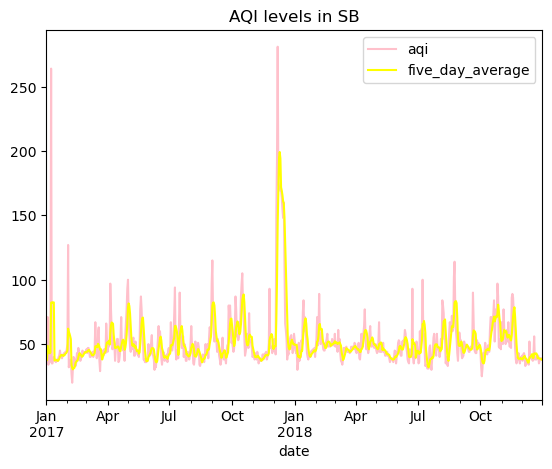

In [57]:
# plot daily AQI and 5-day avg

#initialize plot
plt.figure()

#plot with 5-day avg on top of the AQI
aqi_sb.plot(y=['aqi', 'five_day_average'], title='AQI levels in SB', color = ['pink', 'yellow'])

#The Thomas fire event in December of 2017 is visable on the plot as a high spike. 

## 11

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.